# 6.1.4 Create Latitude and Longitude Combinations

In [366]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

#### Add the code that generates the latitudes and longitudes  
first, they need to be stored for later access  
declare each array as a variable since an array of latitudes and longitudes is being created.  
To ensure enough lats and longs are created, begin with 1500  
Pack the lats and longs as pairs and zip them (lat_lngs) with the "zip()" function.  
- zip object packs each pair of lats lngs having the same index in their respective array into a tuple  

Example: if there are 1500 latitudes and longitudes, there will be 1500 tuples of paired latitudes and longitudes  
where each latitude and longitude in a tuple can be accessed by the index of 0 and 1 respectively.  
- Can only unzip a zipped tuple once before it is removed from the computer's memory.  
- Ensure to unzip the latitudes and longitudes into the coordinates list before moving on.

In [367]:
# Create a set of random latitude and longitude combinations and "zip()" them.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [368]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-26.550199861044426, -127.6986997965613),
 (-25.722822395209576, 34.69682537792997),
 (62.570258815628506, -38.539382927279775),
 (-34.93523554330991, -54.734550391410025),
 (70.96086022250242, 162.22376534990724),
 (-66.68054954020263, 16.9635595043832),
 (-43.14434260037342, 115.1759036986906),
 (64.88015016092342, -135.50862742815085),
 (52.64707548647527, -96.90910140294318),
 (-15.99883930200005, -56.702761665104916),
 (-35.03526691869719, -67.48410704571603),
 (34.98591738497369, -42.09004353755532),
 (60.560832321010565, 125.71154414099306),
 (58.618570370264564, 34.59179865871417),
 (18.278114704926935, -74.05917674452478),
 (3.6650609695514618, -15.348726495952775),
 (48.992642313063726, 96.94284314039794),
 (39.98381229335928, 127.91550858552449),
 (70.54187167004721, 120.03810809052021),
 (-3.0261790252367717, -88.7081032781789),
 (46.99461557427921, 6.506925937788566),
 (-29.278761048663327, 56.402234502301866),
 (-24.63761922527958, 84.17014442707375),
 (-24.845975111132

# 6.1.5 Generate Random World Cities

Match coordinates up with cities  
With the list of random latitudes and longitudes, use the coordinates in lat_lngs tuple to find the nearest city  
using Python's "citipy module".  

Install(using "pip install citipy" from the PythonData Anaconda Prompt), Import and Test "CityPy" module.  
Create a list for holding the cities[].  
Create a for loop that will do the following:  
- Iterate through the coordinates' zipped tuple.  
- Use citipy.nearest_city() and inside the parentheses of nearest_city(),  
- add the latitude and longitude in this format: coordinate[0], coordinate[1].  
- To print the city name, chain the city_name to the nearest_city() function.  
- To print the country name, chain the country_code to the nearest_city() function.  

In [369]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [370]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

645

### Recap

- The previous creates a cities list to store city names.
- Iterate through the coordinates, as in our practice, and retrieve the nearest city using the latitude and longitude pair.
- Add a decision statement with the logical operator not in to determine whether the found city is already in the cities list. If not, use the append() function to add it.  
    -This is done because among the 1,500 latitudes and longitudes, there might be duplicates, which will retrieve duplicate cities; need to be sure only the unique cities are captured.

#### NOTE
The citipy module finds the nearest city to the latitude and longitude pair with a population of 500 or more.

### FINDING  
When the code block is run, there should be slightly more than 500 unique cities. If there are less than 500, the "size" limit on the "np.random.uniform()" function must be increased.

# 6.2.6 Get the City Weather Data
### Pseudocode
- Import our dependencies and initialize counters and an empty list that will hold the weather data.
- Loop through the cities list.
- Group the cities in sets of 50 to log the process as we find the weather data for each city.
    - Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
- Build the city_url or endpoint for each city.
- Log the URL and the record and set numbers.
- Make an API request for each city.
- Parse the JSON weather data for the following:
    - City, country, and date
    - Latitude and longitude
    - Maximum temperature
    - Humidity
    - Cloudiness
    - Wind speed
- Add the data to a list in a dictionary format and then convert the list to a DataFrame.

### Import Dependencies, and Initialize an Empty List and Counters  
- Import your Requests Library.  
- Import the weather_api_key.  
- Build the basic URL for the OpenWeatherMap with weather_api_key added to the URL.  
- Import the datetime module:  
- Declare an empty list at the top of the code block "city_data = []"  
- Add a print statement that references the beginning of the logging  
- Create counters for the record numbers, 1-50  
    - set the counter  

In [371]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [372]:
# Starting URL for Weather Map API Call.
# original URL structure from weathermap site: api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [373]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [374]:
# The code block is initialized with the counters set at 1 because
#      the first iteration of the logging for each recorded response
#      and the set should start at 1

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Next, iterate through the above coded list of cities and begin building the URL for each city,
#      while grouping our records in sets of 50.

# Loop through all the cities in our list.
#for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    #if (i % 50 == 0 and i >= 50):
        #set_count += 1
        #record_count = 1
    # Create endpoint URL with each city.
    #city_url = url + "&q=" + cities[i]

# Create another "for" loop(in this case the "enumerate()" method)
#      to prevent the indexing error by iterating through the [cities] list.
# Using the "enumerate()" method prevents the use of two "for" loops.
# It retrieves both the city and the index from the list.

# Loop through all the cities in the list using "enumerate()" method. (Comment out the previous loop above.)
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities using the try-except statement.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city. In the work environment "pass" should not typically be used.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | xai-xai
Processing Record 3 of Set 1 | tasiilaq
Processing Record 4 of Set 1 | maldonado
Processing Record 5 of Set 1 | cherskiy
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | mayo
Processing Record 9 of Set 1 | gimli
Processing Record 10 of Set 1 | pocone
Processing Record 11 of Set 1 | san rafael
Processing Record 12 of Set 1 | ribeira grande
Processing Record 13 of Set 1 | tommot
Processing Record 14 of Set 1 | moshenskoye
Processing Record 15 of Set 1 | les cayes
Processing Record 16 of Set 1 | bonthe
Processing Record 17 of Set 1 | kungurtug
Processing Record 18 of Set 1 | linjiang
Processing Record 19 of Set 1 | zhigansk
Processing Record 20 of Set 1 | san cristobal
Processing Record 21 of Set 1 | pontarlier
Processing Record 22 of Set 1 | saint-joseph
Processing Record 23 of Set 1 | hitha

Processing Record 38 of Set 4 | birin
Processing Record 39 of Set 4 | odweyne
Processing Record 40 of Set 4 | manado
Processing Record 41 of Set 4 | puerto ayora
Processing Record 42 of Set 4 | pisco
Processing Record 43 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 44 of Set 4 | bengkulu
Processing Record 45 of Set 4 | gaoua
Processing Record 46 of Set 4 | tarata
Processing Record 47 of Set 4 | banda aceh
Processing Record 48 of Set 4 | mandalgovi
Processing Record 49 of Set 4 | okhotsk
Processing Record 50 of Set 4 | roebourne
Processing Record 1 of Set 5 | vadso
Processing Record 2 of Set 5 | clyde river
Processing Record 3 of Set 5 | muzhi
Processing Record 4 of Set 5 | east london
Processing Record 5 of Set 5 | miranda
Processing Record 6 of Set 5 | bemidji
Processing Record 7 of Set 5 | chuy
Processing Record 8 of Set 5 | san policarpo
Processing Record 9 of Set 5 | yellowknife
Processing Record 10 of Set 5 | naberera
Processing Record 11 of Set 5 | alugan
Pro

Processing Record 29 of Set 8 | mitsamiouli
Processing Record 30 of Set 8 | sun valley
Processing Record 31 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 32 of Set 8 | san antonio
Processing Record 33 of Set 8 | chegem
Processing Record 34 of Set 8 | bednodemyanovsk
City not found. Skipping...
Processing Record 35 of Set 8 | bilibino
Processing Record 36 of Set 8 | terre haute
Processing Record 37 of Set 8 | ibimirim
Processing Record 38 of Set 8 | sogdiondon
City not found. Skipping...
Processing Record 39 of Set 8 | sumbawa
City not found. Skipping...
Processing Record 40 of Set 8 | honiara
Processing Record 41 of Set 8 | nabire
Processing Record 42 of Set 8 | vilhena
Processing Record 43 of Set 8 | aswan
Processing Record 44 of Set 8 | nova aurora
Processing Record 45 of Set 8 | sambava
Processing Record 46 of Set 8 | malko tarnovo
Processing Record 47 of Set 8 | laredo
Processing Record 48 of Set 8 | ormara
Processing Record 49 of Set 8 | talcahuano
Processing Re

Processing Record 18 of Set 12 | ljubuski
Processing Record 19 of Set 12 | khani
Processing Record 20 of Set 12 | lusambo
Processing Record 21 of Set 12 | aksu
Processing Record 22 of Set 12 | nishihara
Processing Record 23 of Set 12 | alihe
Processing Record 24 of Set 12 | ratnagiri
Processing Record 25 of Set 12 | atar
Processing Record 26 of Set 12 | atambua
Processing Record 27 of Set 12 | oranjemund
Processing Record 28 of Set 12 | tuyen quang
Processing Record 29 of Set 12 | tombouctou
Processing Record 30 of Set 12 | svay rieng
Processing Record 31 of Set 12 | komsomolskiy
Processing Record 32 of Set 12 | itaituba
Processing Record 33 of Set 12 | khandyga
Processing Record 34 of Set 12 | salinopolis
Processing Record 35 of Set 12 | lufilufi
Processing Record 36 of Set 12 | buchanan
Processing Record 37 of Set 12 | svarstad
Processing Record 38 of Set 12 | qandala
Processing Record 39 of Set 12 | elk city
Processing Record 40 of Set 12 | los llanos de aridane
Processing Record 41

In [375]:
print(len(city_data))

591


### **NOTE**  
When retrieving data from an API, or even when scraping a webpage, make sure there is data to parse.  
If not, the script might stop at that moment and not finish getting all the data we need.  

### Handle API Request Errors with try-except Blocks  
This prevents the API request from stopping prematurely if the request does not yield a valid response.  
If the request is not valid, the code will not find the first item requested and skip the city and continue to run.  
The syntax for the "try-except" statement is similar to the "if-else" statement.  

After the record_count +=1 code line add the "try" block.  

After adding a "try" block:  
    - Parse the JSON file.  
    - Assign variables for each piece of data needed.  
    - Add the data to the cities list in a dictionary format.  

### **IMPORTANT**
Generally, it isn't good coding practice to add the pass statement to the except block.  
Ideally, should handle or catch each error as it happens and do something specific  
(e.g., add another try block or print out the error).  

# 6.2.7 Create a DataFrame of City Weather Data  
Convert to DataFrame  
Export to csv file

In [376]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,71.06,68,15,5.21,PF,2021-07-25 22:42:28
1,Xai-Xai,-25.0519,33.6442,60.26,72,16,6.44,MZ,2021-07-25 22:42:28
2,Tasiilaq,65.6145,-37.6368,42.96,82,35,3.71,GL,2021-07-25 22:42:28
3,Maldonado,-34.6667,-54.9167,60.22,96,84,6.31,UY,2021-07-25 22:38:26
4,Cherskiy,68.7500,161.3000,51.91,52,9,8.14,RU,2021-07-25 22:42:29
5,Bredasdorp,-34.5322,20.0403,52.29,87,100,1.14,ZA,2021-07-25 22:42:29
6,Albany,42.6001,-73.9662,81.25,88,29,4.68,US,2021-07-25 22:42:29
7,Mayo,38.8876,-76.5119,90.37,75,1,3.00,US,2021-07-25 22:42:29
8,Gimli,50.6336,-96.9907,86.43,28,62,11.50,CA,2021-07-25 22:42:30
9,Pocone,-16.2567,-56.6228,82.81,29,2,5.79,BR,2021-07-25 22:42:30


In [377]:
# Reorder the DataFrame column order
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-07-25 22:42:28,-23.1203,-134.9692,71.06,68,15,5.21
1,Xai-Xai,MZ,2021-07-25 22:42:28,-25.0519,33.6442,60.26,72,16,6.44
2,Tasiilaq,GL,2021-07-25 22:42:28,65.6145,-37.6368,42.96,82,35,3.71
3,Maldonado,UY,2021-07-25 22:38:26,-34.6667,-54.9167,60.22,96,84,6.31
4,Cherskiy,RU,2021-07-25 22:42:29,68.7500,161.3000,51.91,52,9,8.14
...,...,...,...,...,...,...,...,...,...
586,Poroshkovo,UA,2021-07-25 22:45:19,48.6683,22.7533,69.91,79,77,4.61
587,Mount Isa,AU,2021-07-25 22:45:19,-20.7333,139.5000,56.97,33,13,5.75
588,Sao Sebastiao,BR,2021-07-25 22:45:19,-23.7600,-45.4097,65.71,66,0,6.58
589,Hagere Selam,ET,2021-07-25 22:45:20,6.4833,38.5167,45.91,91,100,2.80


In [378]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# 6.3.1 Plot Latitude vs. Temperature  
Create a series of scatter plots for each weather parameter against the latitude for all cities.  
- create scatter plots for latitude vs. maximum temperature, humidity, cloudiness, and wind speed  

Summarize how different weather parameters change based on the latitude.  

#### Get Data for Plotting 

In [379]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

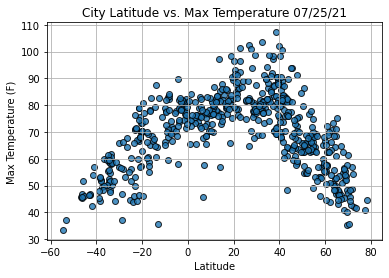

In [380]:
# Add "time.strftime("%x") to "plt.title()" function in the scatter plot.
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

# 6.3.2 Plot Latitude vs. Humidity  
Refactor the scatter plot code by changing:  
- the y-axis variable to "humidity",  
- the title to "Humidity (%)", and  
- the y-axis label to "Humidity (%)".  

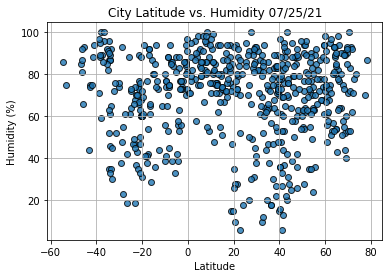

In [381]:
# Change the y-axis variable to "humidity" and the title to "Humidity" and y-axis label to "Humidity(%)".
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

# 6.3.3 Plot Latitude vs. Cloudiness  
Refactor the scatter plot code by changing:  
- the y-axis variable to "cloudiness",  
- the title to "Cloudiness (%)", and  
- the y-axis label to "Cloudiness (%)".  

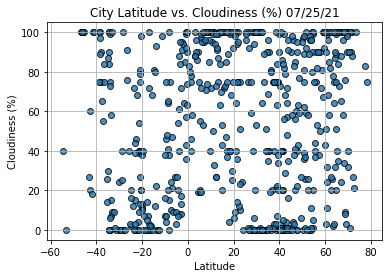

In [382]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

# 6.3.4 Plot Latitude vs. Wind Speed  
Refactor the scatter plot code by changing:
- the y-axis variable to "wind_speed",
- the title to "Wind Speed (%)", and
- the y-axis label to "Wind Speed (mph)".

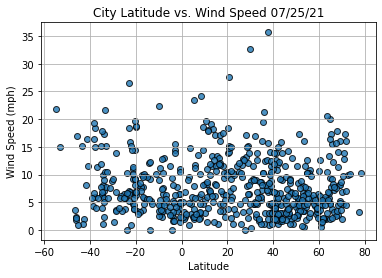

In [383]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# 6.4.1 Use Linear Regression to Find the Relationship Between Variables  
Linear regression  
- used to find a relationship between a dependent variable and one or more independent variables 
- uses the line equation (y = mx + b) to define the relationship  
- y(dependent), m(slope), x(independent), and b(y-intercept)  
- also provides correlation coefficient or r-value  
    - indicates the strength of the relationship  
    - an r-value close to 1 shows a strong positive correlation  
    - an r-value close to -1 shows a strong positive correlation  
    - an r-value close to 0 shows no correlation at all  
- Independent Variable  
    - the variable changed by the analyst to observe how it affects the dependent variable  
- Dependent Variable  
    - the variable tested by the analyst to observe how it is affected by the independent variable  

In the code to perform linear regression, the "linregress()" function takes two arguments, the x- and y-axes data and returns the following:  
- Slope of the regression line as "slope"  
- y-intercept as "intercept"  
- Correlation coefficient as "r_value"  
- p-value as "p_value"  
- Standard error as "std_err"  

### Important  
The slope, intercept, r_value, p_value, and std_errare always returned when linregress function is run. If the calculation one of these values is not wanted, but is not added inside the parentheses, "ValueError: too many values to unpack" will be returned.

To prevent this error, add a comma and underscore for each uncalculated value.

Example, to prevent printing out the p-value and the standard error, write the function as (slope, intercept, r_value, _, _) = linregress(x, y).  

### NOTE
In statistics, the p-value is used to determine significance of results. In most cases, data scientists like to use a significance level of 0.05, which means:
- A linear regression with a p-value > 0.05 is not statistically significant.
- A linear regression with a p-value < 0.05 is statistically significant.
- P-values can also be used to justify rejecting a null hypothesis. 

# 6.4.2 Find the Correlation Between Latitude and Maximum Temperature  
Generate a regression line for latitude and maximum temperature for the Northern and Southern Hemispheres.  
Perform linear regression on all four weather parameters: maximum temperature, humidity, cloudiness, and wind speed.  

### Create a Linear Regression Function  
Generate a regression line for latitude and maximum temperature for the Northern and Southern Hemispheres.
Perform linear regression on all four weather parameters: maximum temperature, humidity, cloudiness, and wind speed.

Refactor the code making only four small changes by converting the linear regression calculation and plotting to a function.
Reuse the following code with minor changes for each weather parameter in each hemisphere.
The variables for each graph are as follows:

- The x values, the latitudes  
- The y values, each of the four weather parameters  
- The y label, the weather parameter being plotted  
- The x- and y-values given as a tuple, (ex. 10,40), for the regression line equation to be placed on the scatter plot.

In [384]:
# Create a function, "plot_linear_regression"  
#      and add the four parameters inside the parentheses.  
# def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):  

# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

### Create the Hemisphere DataFrames  
Add some code to perform regression analysis on the maximum temperatures in the Northern and Southern Hemispheres.  
Create Northern Hemisphere DataFrames from the city_data_df DataFrame.  
Create a new DataFrame from a current DataFrame using the loc method on the current DataFrame  
- syntax to get a specific row from a current DataFrame is row = df.loc[row_index]. 


In [385]:
# Apply this method to city_data_df DataFrame by adding the code index13 = city_data_df.loc[13]  
index13 = city_data_df.loc[13]
index13

City                  Moshenskoye
Country                        RU
Date          2021-07-25 22:42:31
Lat                       58.5102
Lng                       34.5911
Max Temp                    57.04
Humidity                       68
Cloudiness                     81
Wind Speed                   4.29
Name: 13, dtype: object

In [386]:
# Can also filter a DataFrame based on a value of a row.
# Filter the city_data_df DataFrame using the code city_data_df["Lat"]>=0.
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4       True
       ...  
586     True
587    False
588    False
589     True
590     True
Name: Lat, Length: 591, dtype: bool

In [387]:
# Add a conditional filter inside the brackets to return a DataFrame with all data fitting the criteria  
#      for latitudes greated than or equal to 0.
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Tasiilaq,GL,2021-07-25 22:42:28,65.6145,-37.6368,42.96,82,35,3.71
4,Cherskiy,RU,2021-07-25 22:42:29,68.7500,161.3000,51.91,52,9,8.14
6,Albany,US,2021-07-25 22:42:29,42.6001,-73.9662,81.25,88,29,4.68
7,Mayo,US,2021-07-25 22:42:29,38.8876,-76.5119,90.37,75,1,3.00
8,Gimli,CA,2021-07-25 22:42:30,50.6336,-96.9907,86.43,28,62,11.50
...,...,...,...,...,...,...,...,...,...
584,Shawville,CA,2021-07-25 22:45:18,45.6001,-76.4827,81.09,58,58,1.79
585,Jiaohe,CN,2021-07-25 22:45:18,43.7286,127.3447,75.90,76,91,1.97
586,Poroshkovo,UA,2021-07-25 22:45:19,48.6683,22.7533,69.91,79,77,4.61
589,Hagere Selam,ET,2021-07-25 22:45:20,6.4833,38.5167,45.91,91,100,2.80


In [388]:
# Since the previous is a DataFrame,  
#      add the head() method at the end to get the first five rows,  
#      not counting the row of column headings.  
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Tasiilaq,GL,2021-07-25 22:42:28,65.6145,-37.6368,42.96,82,35,3.71
4,Cherskiy,RU,2021-07-25 22:42:29,68.7500,161.3000,51.91,52,9,8.14
6,Albany,US,2021-07-25 22:42:29,42.6001,-73.9662,81.25,88,29,4.68
7,Mayo,US,2021-07-25 22:42:29,38.8876,-76.5119,90.37,75,1,3.00
8,Gimli,CA,2021-07-25 22:42:30,50.6336,-96.9907,86.43,28,62,11.50


In [389]:
# Assign this DataFrame to the variable "northern_hemi_df" to access the data to perform linear regression.  
# Can take the same approach to get the cities for the Southern Hemisphere by  
#      filtering the city_data_df DataFrame for latitudes less than 0.  

# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

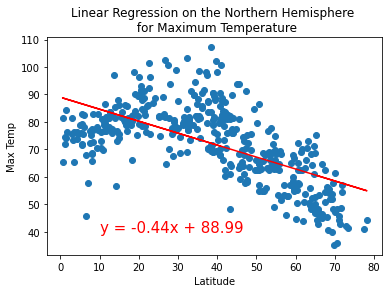

In [390]:
# Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere  
# To generate the linear regression on the maximum temperature for the Northern Hemisphere,
#      need x and y values. 
# Set the x values equal to the latitude column and the y values equal to the maximum temperature column from
#      the northern_hemi_df DataFrame.  
# Call the plot_linear_regression function with the x and y values,
#      and edit the title, y_label, and text_coordinates for the maximum temperature scatter plot.  
# Add the code to a new cell and run it to generate the linear regression and plot the data.

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", 'Max Temp', (10,40))

### NOTE
If the equation for the regression line doesn't show up on the graph,  
change the text_coordinates until the equation shows up.  

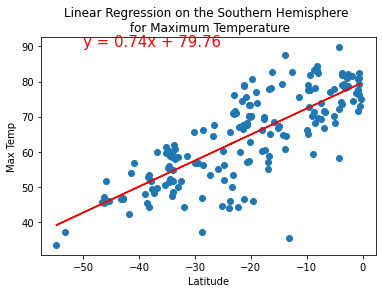

In [391]:
# Perform Linear Regression on the Maximum Temperature for the Southern Hemisphere  
# To generate the linear regression on the maximum temperature for the Southern Hemisphere,
#      reuse the code for the Northern Hemisphere and replace the northern_hemi_df DataFrame
#      with the southern_hemi_df DataFrame to get the x- and y-values.
# Call the plot_linear_regression function with the x- and y-values,
#      and edit the title, y_label, and
#      text_coordinates for the maximum temperature scatter plot.

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

### FINDING  
The correlation between the latitude and the maximum temperature is strong  
to very strong because the r-value is less than –0.7 for the Northern Hemisphere  
and greater than 0.7 for the Southern Hemisphere, as shown by the plots here.  
This means the closer to the equator, 0° latitude, the temperatures become warmer.  
And the further from the equator the temperatures become cooler.  
Check the r-values for the plots. 

# 6.4.3 Find the Correlation Between Latitude and Percent Humidity  
Create the linear equation and scatter plot of the latitude and percent humidity for the Northern and Southern Hemispheres.  
Using the plot_linear_regression function, we can generate the regression lines on the percent humidity for  
the Northern and Southern Hemispheres.  

### Perform Linear Regression on the Percent Humidity for the Northern Hemisphere
Set the x-value equal to the latitude column and y-value equal to the Humidity column from the northern_hemi_df DataFrame.  
Call the plot_linear_regression function with the x- and y-values, and edit the title, y_label, and text_coordinates for the percent humidity scatter plot.

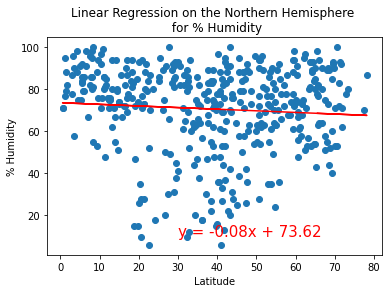

In [392]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(30,10))

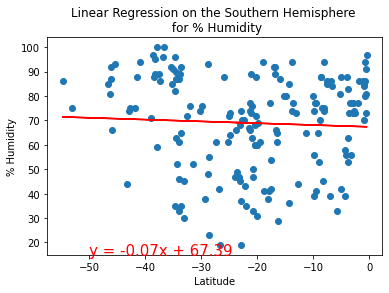

In [393]:
# Perform Linear Regression on the Percent Humidity for the Southern Hemisphere  
# Set the x-value equal to the latitude column and y-value equal to the humidity column
#      from the southern_hemi_df DataFrame.
# Call the plot_linear_regression function, with the x-and y-values,
#      and edit the title, y_label, and text_coordinates for the percent humidity scatter plot.

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

## FINDING  
The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for  
the Northern and Southern Hemispheres for the plots shown here.  
This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease  
percent humidity.  
Check the r-values for plots.  


# 6.4.4 Find the Correlation Between Latitude and Percent Cloudiness  
Create the linear equation plot on the latitude and percent humidity for the Northern and Southern Hemispheres.

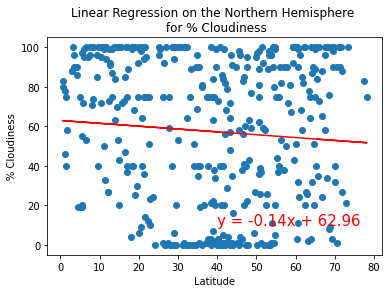

In [394]:
# Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere  
# Skill Drill  
# Refactor the previous code used for linear regression lines and plots to create the x- and y-values
#      for the percent cloudiness and latitudes on the Northern Hemisphere DataFrame.
# Call the plot_linear_regression function with the correct arguments to create the linear regression line
#      and plot for percent cloudiness in the Northern Hemisphere. It should look like the following plot.  

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

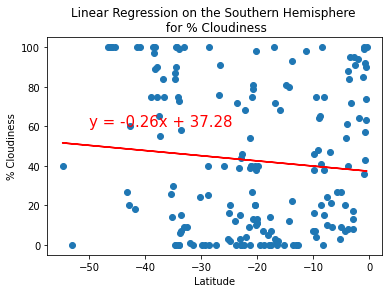

In [395]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

## FINDING  
The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. Check the r-values for your plots. 

# 6.4.5 Find the Correlation Between Latitude and Wind Speed  

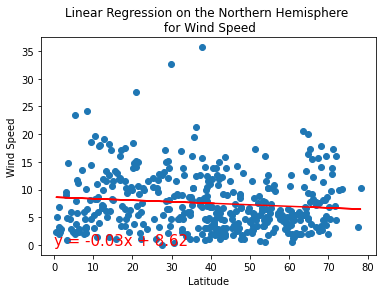

In [396]:
# Perform Linear Regression on the Wind Speed for the Northern Hemisphere  
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed','Wind Speed',(0,0))

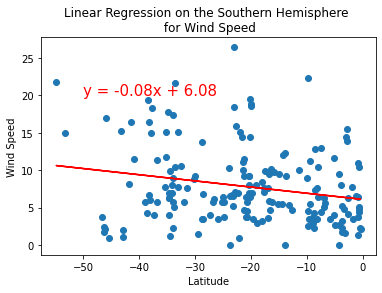

In [397]:
# Perform Linear Regression on the Wind Speed for the Southern Hemisphere  
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))

## FINDING  
The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. Check the r-values for your plots. 